<a href="https://colab.research.google.com/github/PrakritiShetty/MachineLearning/blob/main/kMeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("/content/sample_data/kmeansdata.csv")
df.head()

,name,age,income
0,bob,27,70.0
1,michael,29,90.0
2,mohan,29,61.0
3,ismail,28,60.0
4,kory,42,150.0


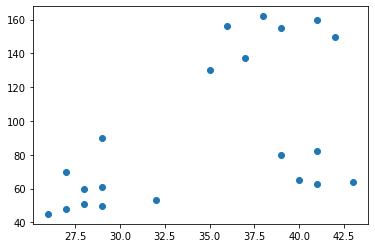

In [4]:
plt.scatter(df['age'],df['income'])

In [5]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [7]:
y_predicted = km.fit_predict(df[['age','income']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2],
      dtype=int32)

In [8]:
df['cluster'] = y_predicted
df.head()

,name,age,income,cluster
0,bob,27,70.0,2
1,michael,29,90.0,2
2,mohan,29,61.0,0
3,ismail,28,60.0,0
4,kory,42,150.0,1


No handles with labels found to put in legend.


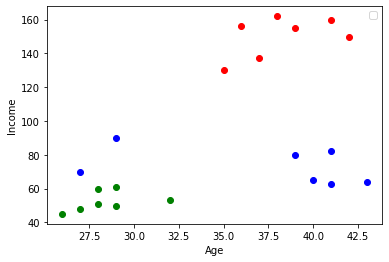

In [10]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

plt.scatter(df1.age, df1['income'],color="green")
plt.scatter(df2.age, df2['income'], color="red")
plt.scatter(df3.age, df3['income'], color="blue")

plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

if values of age and income were too far away( real possibilty ) then use scaler to reduce clustering errors

In [18]:

scaler= MinMaxScaler()
scaler.fit(df[['income']])
df['income'] = scaler.transform(df['income'])
scaler.fit(df.age)
df.age= scaler.transform(df.age)

AttributeError: ignored

In [ ]:
km= KMeans(n_clusters=3)
y_predicted= km.fit_predict(df[['age','income']])
y_predicted

In [ ]:
df['cluster']=y_predicted
df.drop('cluster',axis='columns',inPlace=True)
df

In [ ]:
km.cluster_centers_

In [ ]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

plt.scatter(df1.age, df1['income'],color="green")
plt.scatter(df2.age, df2['income'], color="red")
plt.scatter(df3.age, df3['income'], color="blue")
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', label='centroid')

plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

Elbow Method

In [ ]:
k_rng= range(1,10)
sse=[]
for k in k_rng:
  km=KMeans(n_clusters=k)
  km.fit(df[['age','income']])
  sse.append(km.inertia_) #sse

sse

In [ ]:
plt.xlabel('X')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)